# __Модель для определения (детекции):__
- картонных коробок
- стекла
- металла
- бумаги
- пластмасы
- органическорого отхода

## __Шаг 0 (опционально).__ Зугрузка dataset из roboflow, если требуется провести оценку и/или дообучения модели

In [ ]:
# устанавливаем библиотеку roboflow для получения dataset
# необходимо для оценки модели

%pip install -q roboflow

In [ ]:
# импортируем библиотеку 
from roboflow import Roboflow

In [ ]:
# зугружаем dataset на котором проводилось обучения модели YOLO
# данный dataset предназначен для оценки обученной модели

rf = Roboflow(api_key='iQWleNUHxkrlNJNQx8D3') # api key - для доступа в roboflow
project = rf.workspace('image-processing-home-assignment').project('trash-detection-kfzaq') # источник dataset
dataset = project.version(10).download('yolov8') # версия проекта

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Detection-10 in yolov8:: 100%|██████████| 15032/15032 [00:25<00:00, 580.11it/s] 


___

## __Шаг 1 (опционально)__. Дообучить модель
> __ВНИМАНИЕ__ данный процесс требуется выполнять на GPU 
>>(пример: моя модель была дообучена в google colab, GPU L4 - заняло от 1,5 до 2 часов)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="Trash-Detection-10/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Trash-Detection-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f832a76af00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

> __ВНИМАНИЕ__ после дообучения модель, веса (лучший чекпоинт) сгенерируется в папке где был запущен скрипт и далее  
__runs/detect/train/weights/best.pt__
___

## __Шаг 2 (основной).__ Проверка модели для анализа фото (картинки) на тесовых данных.
> модель обучалась с 3 разными конфигурациями:  
>> наименование весов (лучший чекпоинт) - конфигурация при обучении  
>> best_yolo8n_ep_80_batch_16.pt - model version: yolo8n, epochs: 80, batch size: 16  
>> best_yolo8s_ep_100_batch_16.pt - model version: yolo8s, epochs: 100, batch size: 16  
>> best_yolo8s_ep_110_batch_8.pt - model version: yolo8s, epochs: 110, batch size: 8

In [ ]:
# устанавливаем библиотеку ultralytics для использования модели YOLO

%pip install -q ultralytics

In [ ]:
# импортируем все необходимые библиотеки
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\1.jpg: 640x640 1 metal, 6 organic wastes, 1267.8ms
Speed: 24.2ms preprocess, 1267.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


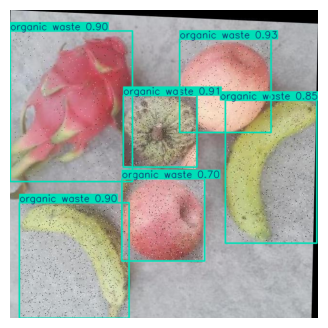


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\2.jpg: 640x640 5 metals, 1 organic waste, 1236.4ms
Speed: 7.0ms preprocess, 1236.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


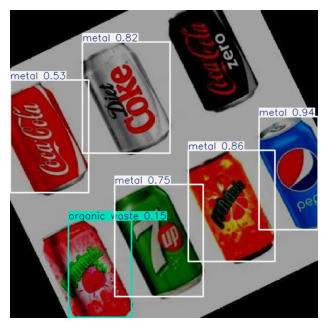


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\3.jpg: 640x640 2 glasss, 1174.8ms
Speed: 7.1ms preprocess, 1174.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


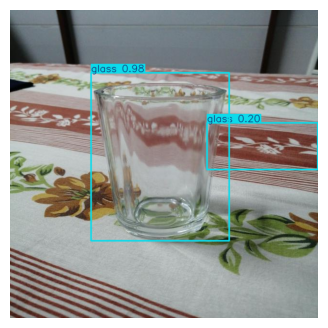


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\4.jpg: 640x640 1 plastic, 1460.8ms
Speed: 7.4ms preprocess, 1460.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


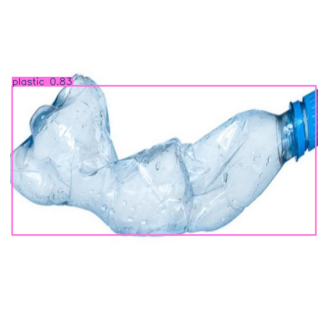


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\5.jpg: 640x640 1 cardboard, 1215.8ms
Speed: 7.3ms preprocess, 1215.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


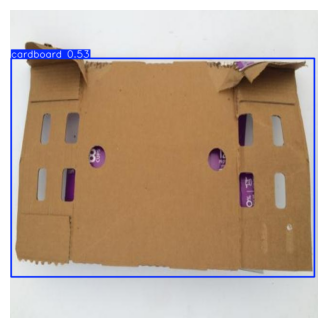


image 1/1 d:\02_ \01_ Data Science_ML\\My-projects\08_ Project_1_semester\data\6.jpg: 640x640 1 metal, 4 plastics, 1245.7ms
Speed: 6.4ms preprocess, 1245.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


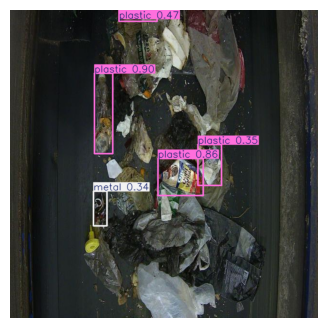

In [ ]:
model = YOLO('best_yolo8s_ep_110_batch_8.pt') # можно выбрять один из 3 весов (лучший чекпоинт)

# необходимо в папку data вложить все фото (картинки) которые необходимо проанализировать
for file in os.listdir("data"): # перебор всех фото (картинок) в папке data для анализа
    if file.lower().endswith((".jpg", ".png", ".jpeg", ".webp")):
        path = f"data/{file}"
        results = model(path, conf=0.15) # 
        img = results[0].plot() # визуализация резульатата
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # для коррекции (уменьшения) синего оттенка
        plt.figure(figsize=(6, 4))  # задаём меньшие размеры окна
        plt.imshow(img)
        plt.axis('off')
        plt.show()

___
## __Шаг 3.__ Оценка модели по 4 метрикам.
> ___Внимание!!!___ данный шаг запускать __тольк опосле выполнения Шаг 0.__ 

In [37]:
# в выброном dataset есть тестовая выборка, поэтому оценку проводим по ней 
test_metrics = model.val(data='Trash-Detection-10/data.yaml', split='test')

print('mAP@0.5:', test_metrics.box.map50)
print('mAP@0.5:0.95:', test_metrics.box.map)
print('Precision:', test_metrics.box.mp)
print('Recall:', test_metrics.box.mr)

Ultralytics 8.3.237  Python-3.13.1 torch-2.9.1+cpu CPU (Intel Core i5-3230M 2.60GHz)
val: Fast image access  (ping: 0.20.1 ms, read: 118.877.6 MB/s, size: 46.7 KB)
val: Scanning D:\02_ Обучение\01_ Data Science_ML\МИФИ\My-projects\08_ Project_1_semester\Trash-Detection-10\test\labels.cache... 995 images, 289 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 995/995 638.7Kit/s 0.0s
WARNING Box and segment counts should be equal, but got len(segments) = 166, len(boxes) = 1990. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 17.3s/it 18:1317.0s
                   all        995       1990      0.709      0.506        0.6      0.398
             cardboard        236        308      0.733      0.448      0.587      0.415
                 glass        101        1